#Auto Derivatives:

Setting up a computational graph to do a forward and backward pass to calculate the value of the function and its derivative:

Mathematics behind method:

A function can be split up into different sub operations like addition, subtraction, multiplication and division (in order to extend this method, exponents, logarithms and other basic functions can be implemented). The derivative for two numbers being added or multiplied is fairly easy to find. The derivative of the whole function is the derivative of the sub operations multiplied according to the chain rule.

For example:

$f(x) = 3(a+bc)$

This can be split into:

$ f(x) = 3(u)$ where $u = a+bc$

$ u = a+(v)$ where $v = bc$

Thus, we have introduced two variables u and v where u is the multiplication operation and v is the division operation.

This can be represented in a tree datastructure:

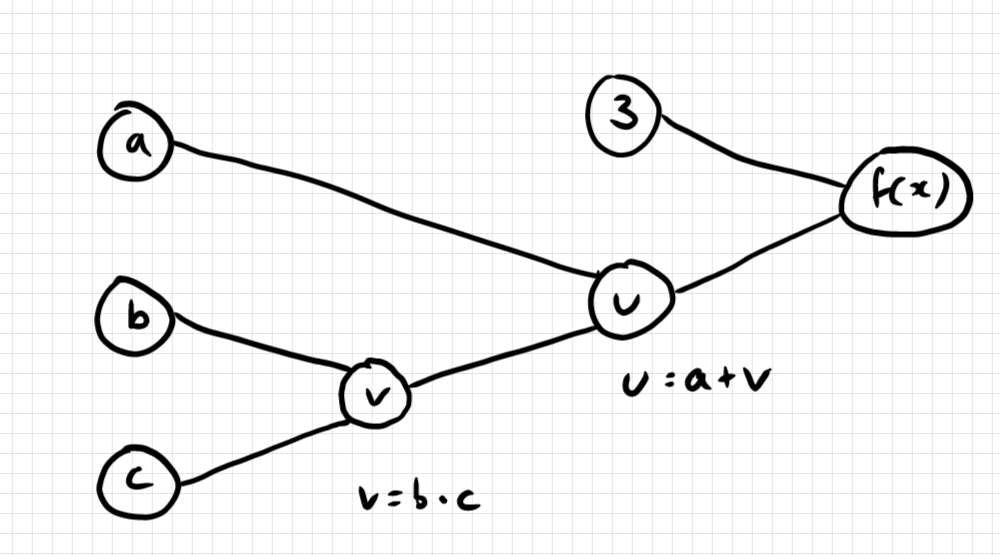








## Forward Pass

By assigning the variables a certain value, the values can be propogated through the tree from each node until it reaches the root note of the binary tree. This is shown in the diagram below and implemented in the code in the next cell:

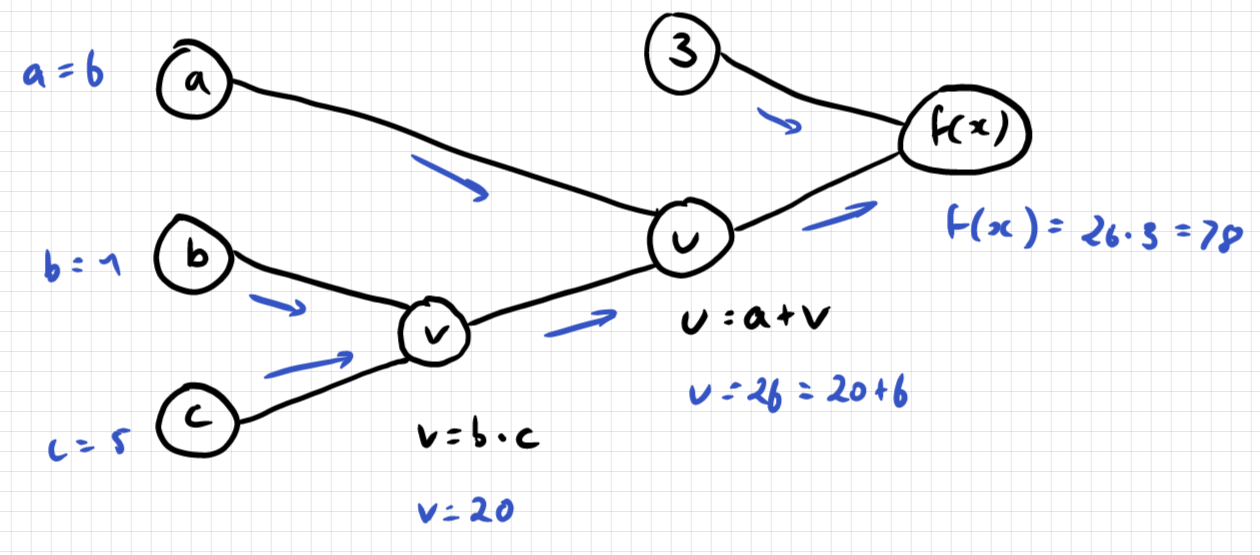

The idea behind the forward propogation step is that a recursive method can be used. The nodes can be set up as operation nodes which have left and right branches, variable nodes that have values which can be assigned and constant nodes which are already assigned with values. The constant nodes and variable nodes will always be leafs. 

In order to perform the forward pass, we can start from the root node or f(x) and then evaluate the left and right nodes which will then evaluate their left and right nodes until we reach the leaf nodes. There by all the nodes will be evaluated from bottom up.

In [ ]:
#Setting up the tree data structure using classes

class expr:
  pass

#addition, multiplication, subtraction and division are implemented

#each operation is represented as an object having a left and a right branch along with a type and 
#the derivative of the operation with respect to the right branch and left branch

class add (expr):

  def __init__(self, r, l): #initialize the class with a value for its right and left branches
    self.r = r #method to get value of right branch
    self.l = l #method to get value of left branch
    self.t = "add" #type of node
    self.dr = 1 #derivative of operation with respect to right branch
    self.dl = 1 #derivative of operation with respect to left branch
  
  def eval(self, env):
    return self.l.eval(env) + self.r.eval(env) #evaluate the node. Perform the operation after having performed the operations of the right and left branches (recursive approach)

class multiply (expr):

  def __init__(self, r, l):
    self.r = r
    self.l = l
    self.t = "product"
    self.dr = l
    self.dl = r
  
  def eval(self, env):
    return self.l.eval(env) * self.r.eval(env)
  
class division (expr):

  def __init__(self, r, l):
    self.r = r
    self.l = l
    self.t = "div"
  
  def eval(self, env):
    return self.l.eval(env) / self.r.eval(env)

class subtract (expr):

  def __init__(self, r, l):
    self.r = r
    self.l = l
    self.t = "sub"
  
  def eval(self, env):
    return self.l.eval(env) - self.r.eval(env)

#The constants and variable classes are defined differently:

#Variables are given a name and have None for left and right as they are the leaf nodes of the tree,
#evaluating them is indexing their value from a predefined dictionary

class var (expr):

  def __init__(self, name):
    self.r = None
    self.l = None
    self.t = "var"
    self.val = name
    self.name = name
    self.dl = 1
    self.dr = 1
  
  def eval(self, env):
    return env[self.name]

#Constants have a given value in their defenition
#Evaluating them returns their value

class const (expr):

  def __init__(self, val):
    self.r = None
    self.l = None
    self.t = "const"
    self.val = val
    self.dl = 1
    self.dr = 1
  
  def eval(self, env):
    return self.val

In [ ]:
e1 = multiply(const(3), add(multiply(var("c"), var("b")) , var("a"))) #set up the binary tree

env = {
  "a" : 6,
  "b" : 4,
  "c" : 5
} # assign the variables

print(e1.eval(env)) #perform the forward pass


78


## Backward Pass

The same can be done but in reverse to calculate the derivatives. The mathematics of this is explained below:

$f = 3u$ 

$\frac{\partial f}{\partial u} = 3$ and $\frac{\partial f}{\partial 3} = u$


Therefore, for a multiplication operation, the derivative of the node with respect to its right branch will be the value of the left branch and vice versa.

Now these partials can be propogated to the next nodes until the end of the tree. The rest of the derivatives are shown in the diagram below:



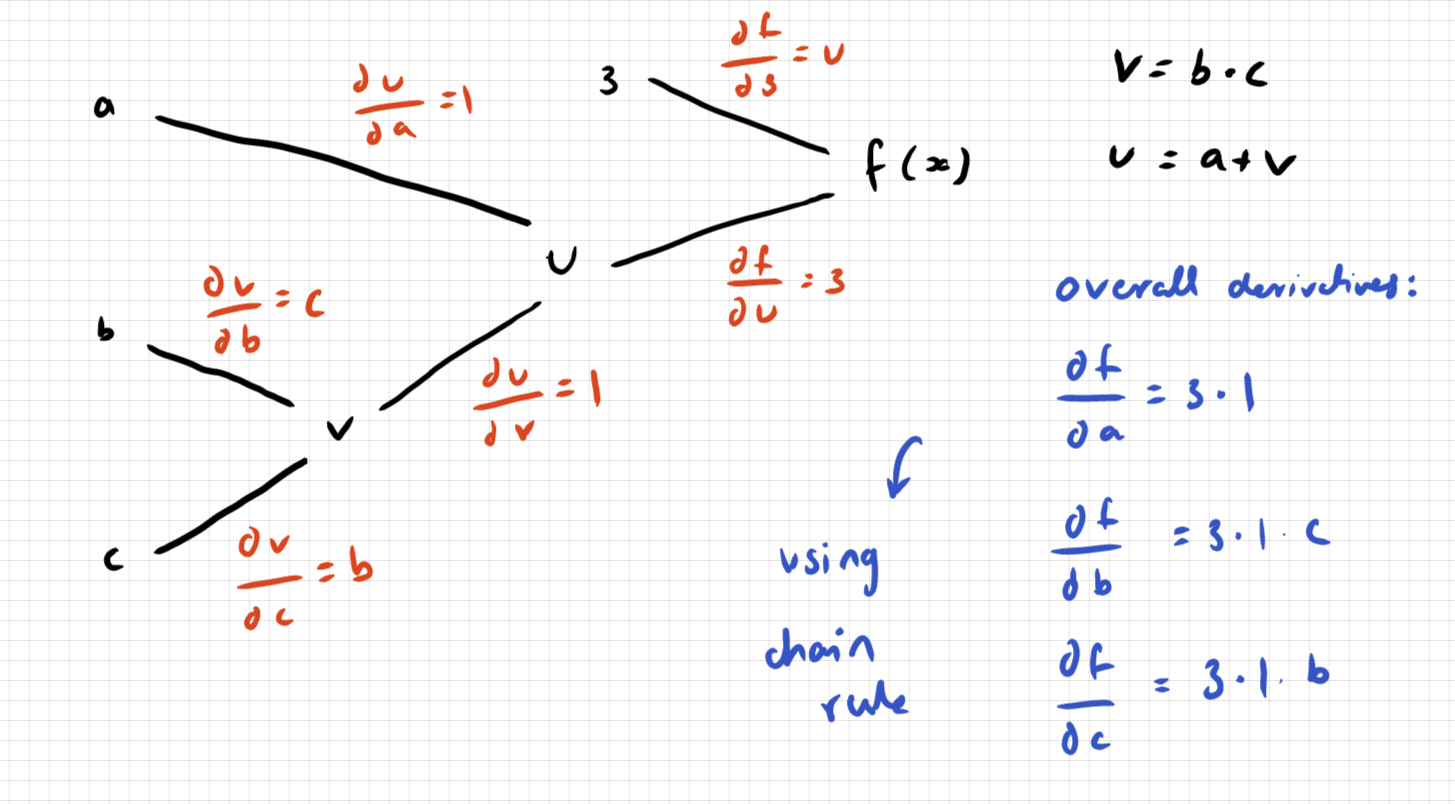

Using this method, we can convert this into an algorithm: 

First we need to find all the paths from the root note or the f(x) node to the leaf nodes which are the constants and the variables. Thus function must output the turns which are taken to reach each node. For example to get from the f(x) node to the c node we need to output a list like [left, left, left]

Then we need to create a function that follows these steps but for every turn, find the derivative of the node in the direction of the turn. In order words, to get the derivative with respect to the variable c, we must first turn left and the derivative of f(x) with respect to its left branch is 3. In this way we must multiply all the derivatives of the nodes with respect to the direction of the path.

The pseudo code for the second function is:

find the derivative of f(x) with respect to the variable c:

derivative = list()

1) current node = f(x), turn left: append to the list the derivative of f(x) with respect to its left branch

2) current node = u, turn left: append to the list the derivative of f(x) with respect to its left branch

3) current node = v, turn left: append to the list the derivative of f(x) with respect to its left branch

In [ ]:
#find all paths from root to the leafs (in order traversal of binary tree using recursion)

mat = [] 

stack = []
der = [] 

def traverse(tree, direction):

  if not tree:
    return 

  stack.append(tree.t)
  der.append(direction)

  traverse(tree.l, "left")

  if tree.l == None and tree.r == None:
    print(der)
    mat.append(list(der))

  traverse(tree.r, "right")

  stack.pop(-1)
  der.pop(-1)

traverse(e1, "left")

['left', 'left', 'left']
['left', 'left', 'right', 'left']
['left', 'left', 'right', 'right']
['left', 'right']


In [ ]:
#Tracing paths through binary tree and multiplying the derivatives of the path to perform the back propogation step

import numpy as np

ders = []

for i in mat:
  bt = e1
  der = []
  #print(i[1:])
  for j in i[1:]:
    if bt:
      #print(j)
      #print(bt.t)
      if j == "left":
        #print(bt)
        #print(bt.dl)
        #print(bt.l)
        if isinstance(bt.dl, int) == False:
          if bt.dl.t == "const":
            der.append(bt.dl.val)
          elif bt.dl.t == "var":
            der.append(bt.dl.name)
          else:
            der.append(bt.dl)
        else:
          der.append(bt.dl)
        bt = bt.l
      if j == "right":
        #print(bt)
        #print(bt.dr)
        #print(bt.r)
        if isinstance(bt.dr, int) == False:
          if bt.dr.t == "const":
            der.append(bt.dr.val)
          elif bt.dr.t == "var":
            der.append(bt.dr.name)
          else:
            der.append(bt.dr)
        else:
          der.append(bt.dr)
        bt = bt.r
  
  ders.append(der)

ders

[[3, 1], [3, 1, 'c'], [3, 1, 'b'], [<__main__.add at 0x7fa0beb9ccd0>]]

As seen above, the derivatives are calculated for all 4 leaf nodes. The constant leaf node is ignored therefore the last value of the array is ignored. After this alteration, the final output is: 

[3, 1], [3, 1, 'c'], [3, 1, 'b']

when the product of these lists are calcualted we get:

$\frac{\partial f}{\partial a} = 3$

$\frac{\partial f}{\partial b} = 3c$

$\frac{\partial f}{\partial a} = 3b$

which match the calculations in the diagram

##Areas for extension:

derivatives for division and product: proving the quotient and product rule? Along with implementing them as nodes

proving the chain rule and why the partials of the sub operations result in the partial derivative of the larger function

Showing the function works for a larger problem

The mathematics of the binary tree?


Taking the general partial derivatives for the function:

$a^b$ and $\frac{a}{b}$ with respect to a and b
